In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Customers_segmentation.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income',
       'Spending_Score']

In [9]:
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
x = data[['Annual_Income','Spending_Score']]

In [11]:
x.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit(x)

In [12]:
from sklearn.cluster import KMeans

In [13]:
sse = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(x)

  sse.append(kmeans.inertia_)

C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress

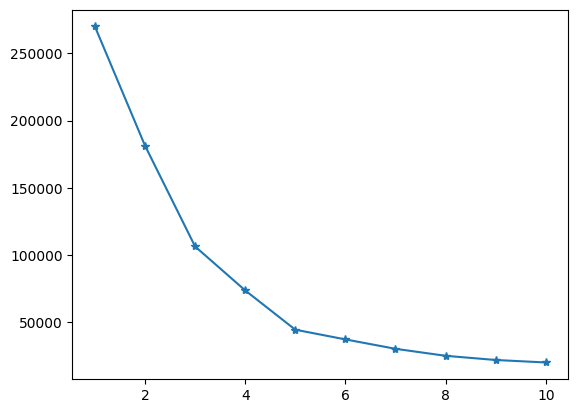

In [14]:
plt.plot(range(1,11),sse,marker='*')
plt.show()

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

Y = kmeans.fit_predict(x)


C:\Python v3.9.7\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
x['cluster'] = Y
x.head()

C:\Users\polis\AppData\Local\Temp\ipykernel_1732\353004654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] = Y


,Annual_Income,Spending_Score,cluster
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [17]:
df1 = x[x.cluster == 0]
df2 = x[x.cluster == 1]
df3 = x[x.cluster == 2]
df4 = x[x.cluster == 3]
df5 = x[x.cluster == 4]

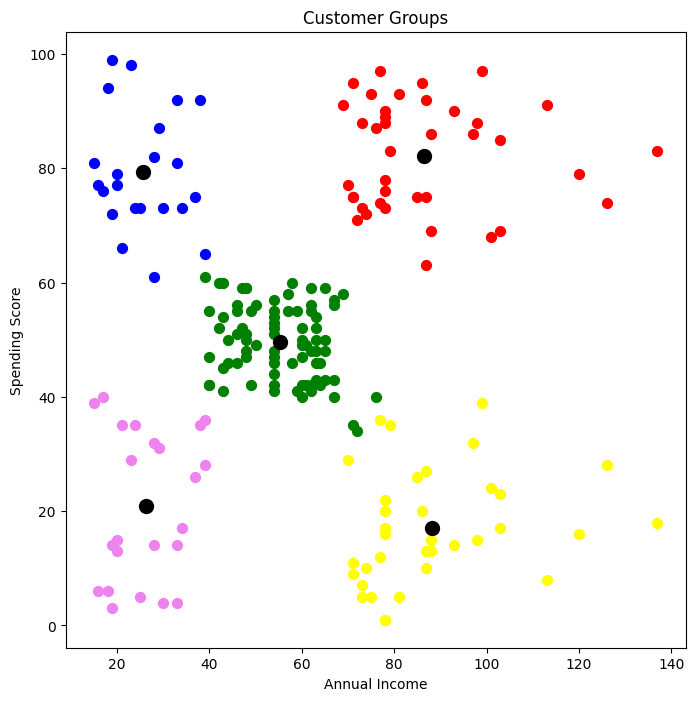

In [23]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(df1['Annual_Income'],df1['Spending_Score'], s=50, c='green', label='Cluster 1')
plt.scatter(df2['Annual_Income'],df2['Spending_Score'] , s=50, c='red', label='Cluster 2')
plt.scatter(df3['Annual_Income'],df3['Spending_Score'], s=50, c='yellow', label='Cluster 3')
plt.scatter(df4['Annual_Income'],df4['Spending_Score'], s=50, c='violet', label='Cluster 4')
plt.scatter(df5['Annual_Income'],df5['Spending_Score'], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


In [ ]:
from sklearn.metrics import  silhouette_score

score = silhouette_score(x,Y)

print(score)
